In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans

### 1. k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` from a kmeans clustering (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)

2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them

3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.

4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

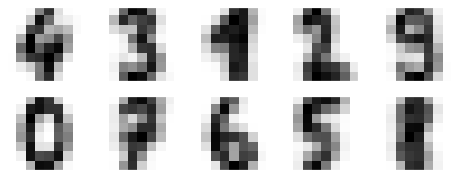

In [8]:
digits = load_digits()
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

0.7952142459654981


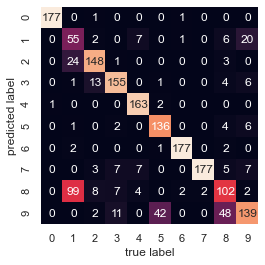

In [9]:
print(accuracy_score(digits.target, labels))

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<font color = 'blue'>The accuracy score shows a high degree of accuracy in the forms. the 4 and the 9 are similar but distinct (as shown in the slight curve at the bottom of the 9. There is a larger confusion between 8 and 1, the blur can make them seem very similar.

5 and 9 are also very similar according to the confusion matrix, as there is only a slight line separating the differences. Similarly, 8 and 9 are also somewhat similar per the confusion matrix as they have similar shape overall but there is the difference of where the hole of the top circle is for the 8 and the 9.</font>

In [11]:
print(fowlkes_mallows_score(digits.target, labels))

0.7041643183491655


<font color = 'blue'>
While the Accuracy score compares exactness, the Fowlkes Mallows (FM) score matches precision and recall. FM score matches similarity geometrically as opposed to accuracy score which predicts whether or not the model is correct. The notes above are more prevalent in here as opposed to for accuracy score as the FM score measures geometry so there is more emphasis on how similar (or not) the clusters are.
    
As per the above notes on accuracy score, 4 and 9 are very similar minus a slight curved line at the bottom of the 9. 8 and 1 are even more harshly scored due to how similar they are. All the other descriptions are the same, simply more harshly scored. Thus the FM score gave a lower number compared to the accuracy score.</font>

### 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=1024. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=1024. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1672: RuntimeWarning: init_size=300 should be larger than k=1024. Setting it to 3*k
  cluster_centers = _init_centroids(


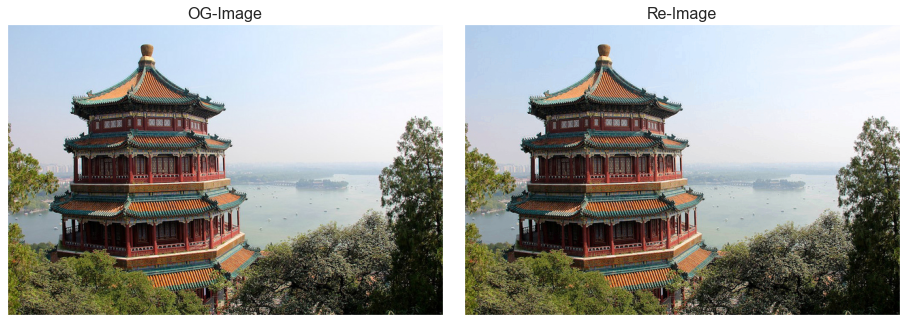

In [22]:
china = load_sample_image("china.jpg")

data = china / 255.0
data = data.reshape(427 * 640, 3)

kmeans = MiniBatchKMeans(1024)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('OG-Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Re-Image', size=16);

<font color = 'blue'>Went with compression value of 1024 instead of 16; this is 64 times higher and allows for less image distortion. The color shapes from the lecture show that while there are a lot of colors (16 million), all the colors can blend well with each other and form a relatively coherent spectrum even at higher compression ratios.

A bit of research online showed that maximum compressions should be 1000 times lower. Tried to do this, at 16,000 colors but the result was it took much too long to get an image. Though the image was definitely indistinguishable from the original, the time concern was much too high. I tried an alternative approach
    
Based on the fact that the original had 16 million, I stuck with the number 16 as a basis. So I took the number 16 and continued to multiply it by 4, e.g. 16 > 64 > 256 > 1024. Doing so, I reached a number 1024 which revealed an image that was indistinguishable by the naked eye.</font>

# 3. Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [51]:
df = pd.read_csv('data/college.csv')

df = df.drop('Unnamed: 0', axis=1)

kmeans = KMeans(n_clusters = 2)

kmeans.fit(df.drop('Private', axis=1))
df.Private = df.Private.map(dict(Yes=1, No=0))

print(confusion_matrix(df.Private, kmeans.labels_),"\n")
print(classification_report(df.Private, kmeans.labels_),"\n")
print(accuracy_score(df.Private, kmeans.labels_),"\n")
print(pd.DataFrame(classification_report(df.Private, kmeans.labels_, output_dict=True)))

[[138  74]
 [531  34]] 

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777
 

0.22136422136422138 

                    0           1  accuracy   macro avg  weighted avg
precision    0.206278    0.314815  0.221364    0.260546      0.285201
recall       0.650943    0.060177  0.221364    0.355560      0.221364
f1-score     0.313280    0.101040  0.221364    0.207160      0.158949
support    212.000000  565.000000  0.221364  777.000000    777.000000


In [65]:
df = pd.read_csv('data/college.csv')

df = df.drop('Unnamed: 0', axis=1)

kmeans = KMeans(n_clusters = 3)

kmeans.fit(df.drop('Private', axis=1))
df.Private = df.Private.map(dict(Yes=1, No=0))

print(confusion_matrix(df.Private, kmeans.labels_),"\n")
print(classification_report(df.Private, kmeans.labels_),"\n")
print(accuracy_score(df.Private, kmeans.labels_),"\n")
print(pd.DataFrame(classification_report(df.Private, kmeans.labels_, output_dict=True)))

[[135  76   1]
 [430   7 128]
 [  0   0   0]] 

              precision    recall  f1-score   support

           0       0.24      0.64      0.35       212
           1       0.08      0.01      0.02       565
           2       0.00      0.00      0.00         0

    accuracy                           0.18       777
   macro avg       0.11      0.22      0.12       777
weighted avg       0.13      0.18      0.11       777
 

0.18275418275418276 

                    0           1    2  accuracy   macro avg  weighted avg
precision    0.238938    0.084337  0.0  0.182754    0.107758      0.126519
recall       0.636792    0.012389  0.0  0.182754    0.216394      0.182754
f1-score     0.347490    0.021605  0.0  0.182754    0.123032      0.110521
support    212.000000  565.000000  0.0  0.182754  777.000000    777.000000


C:\Users\gaia_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
